In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet

In [3]:
dataset = pd.read_csv("avocado.csv")
dataset = dataset.sort_values('Date')

In [4]:
dataset_prophet = dataset[['Date', 'AveragePrice']]
dataset_prophet.columns = ['ds','y']

In [33]:
p = Prophet()
p.fit(dataset_prophet)

22:07:26 - cmdstanpy - INFO - Chain [1] start processing
22:07:31 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = p.make_future_dataframe(periods=1825)
forecast = p.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499563,0.899520,1.866441,1.499563,1.499563,-0.117499,-0.117499,-0.117499,-0.117499,-0.117499,-0.117499,0.0,0.0,0.0,1.382064
1,2015-01-11,1.494268,0.880525,1.904262,1.494268,1.494268,-0.108832,-0.108832,-0.108832,-0.108832,-0.108832,-0.108832,0.0,0.0,0.0,1.385437
2,2015-01-18,1.488974,0.901511,1.882607,1.488974,1.488974,-0.108260,-0.108260,-0.108260,-0.108260,-0.108260,-0.108260,0.0,0.0,0.0,1.380714
3,2015-01-25,1.483679,0.861991,1.841139,1.483679,1.483679,-0.126905,-0.126905,-0.126905,-0.126905,-0.126905,-0.126905,0.0,0.0,0.0,1.356774
4,2015-02-01,1.478385,0.850278,1.814514,1.478385,1.478385,-0.154827,-0.154827,-0.154827,-0.154827,-0.154827,-0.154827,0.0,0.0,0.0,1.323558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2023-03-20,0.097510,-2.511581,2.575827,-2.455476,2.529163,-0.087077,-0.087077,-0.087077,-0.087077,-0.087077,-0.087077,0.0,0.0,0.0,0.010434
1990,2023-03-21,0.096779,-2.592098,2.487261,-2.458825,2.529950,-0.085570,-0.085570,-0.085570,-0.085570,-0.085570,-0.085570,0.0,0.0,0.0,0.011209
1991,2023-03-22,0.096049,-2.490839,2.499206,-2.462175,2.530737,-0.083773,-0.083773,-0.083773,-0.083773,-0.083773,-0.083773,0.0,0.0,0.0,0.012275
1992,2023-03-23,0.095318,-2.539331,2.335566,-2.465525,2.531524,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,0.0,0.0,0.0,0.013620


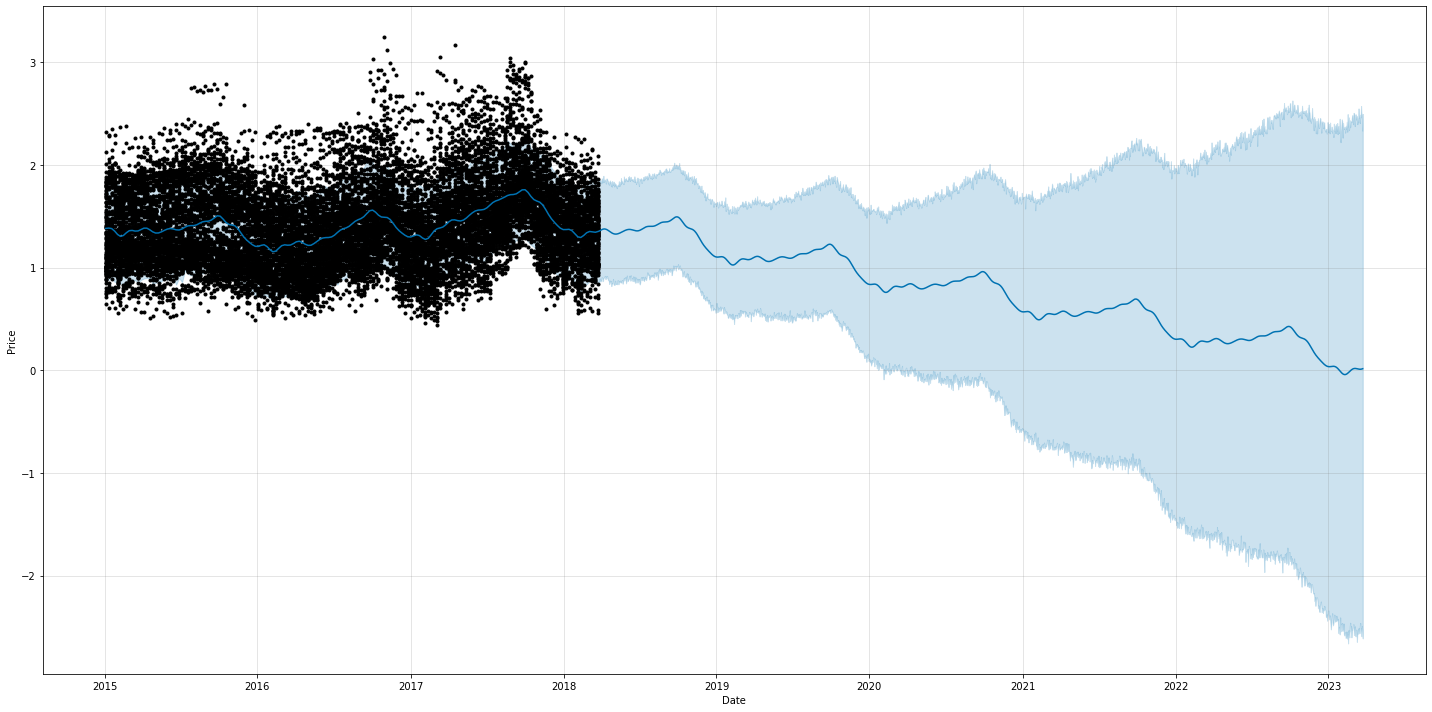

In [35]:
figure = p.plot(forecast, xlabel='Date', ylabel='Price', figsize=(20,10))

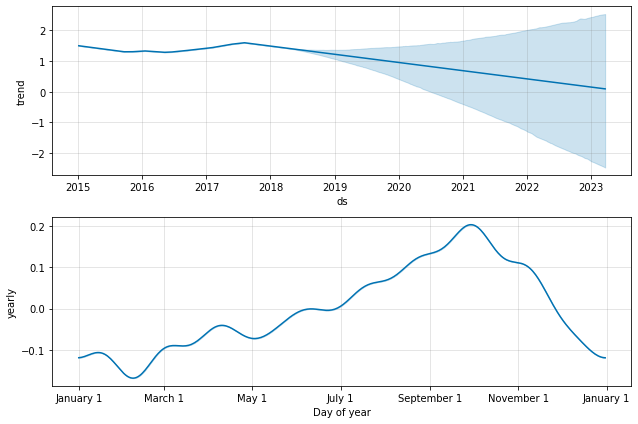

In [36]:
figure = p.plot_components(forecast)

### Avocado Market Prediction for Specific Region

In [24]:
dataset_prophet2 = dataset[dataset['region']=='California']
dataset_prophet2 = dataset_prophet2[['Date', 'AveragePrice']]
dataset_prophet2.columns = ['ds', 'y']

In [25]:
dataset_prophet2

,ds,y
9489,2015-01-04,1.24
363,2015-01-04,0.93
9488,2015-01-11,1.10
362,2015-01-11,0.92
9487,2015-01-18,1.24
...,...,...
8552,2018-03-11,1.11
17674,2018-03-18,1.75
8551,2018-03-18,1.02
8550,2018-03-25,1.04


In [26]:
p2 = Prophet()
p2.fit(dataset_prophet2)

22:06:50 - cmdstanpy - INFO - Chain [1] start processing
22:06:51 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = p2.make_future_dataframe(periods=1825)
forecast = p2.predict(future)

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.304177,0.717770,1.539706,1.304177,1.304177,-0.180546,-0.180546,-0.180546,-0.180546,-0.180546,-0.180546,0.0,0.0,0.0,1.123632
1,2015-01-11,1.304214,0.721945,1.574756,1.304214,1.304214,-0.174233,-0.174233,-0.174233,-0.174233,-0.174233,-0.174233,0.0,0.0,0.0,1.129981
2,2015-01-18,1.304251,0.694291,1.512273,1.304251,1.304251,-0.195099,-0.195099,-0.195099,-0.195099,-0.195099,-0.195099,0.0,0.0,0.0,1.109151
3,2015-01-25,1.304287,0.666636,1.487578,1.304287,1.304287,-0.229112,-0.229112,-0.229112,-0.229112,-0.229112,-0.229112,0.0,0.0,0.0,1.075175
4,2015-02-01,1.304324,0.616760,1.478276,1.304324,1.304324,-0.250420,-0.250420,-0.250420,-0.250420,-0.250420,-0.250420,0.0,0.0,0.0,1.053904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2023-03-20,2.446909,1.853923,2.768160,2.236889,2.654678,-0.128455,-0.128455,-0.128455,-0.128455,-0.128455,-0.128455,0.0,0.0,0.0,2.318454
1990,2023-03-21,2.447356,1.836179,2.759449,2.237365,2.655337,-0.122338,-0.122338,-0.122338,-0.122338,-0.122338,-0.122338,0.0,0.0,0.0,2.325018
1991,2023-03-22,2.447803,1.853006,2.806493,2.237650,2.655996,-0.116068,-0.116068,-0.116068,-0.116068,-0.116068,-0.116068,0.0,0.0,0.0,2.331735
1992,2023-03-23,2.448250,1.872399,2.815464,2.237905,2.656654,-0.109707,-0.109707,-0.109707,-0.109707,-0.109707,-0.109707,0.0,0.0,0.0,2.338543


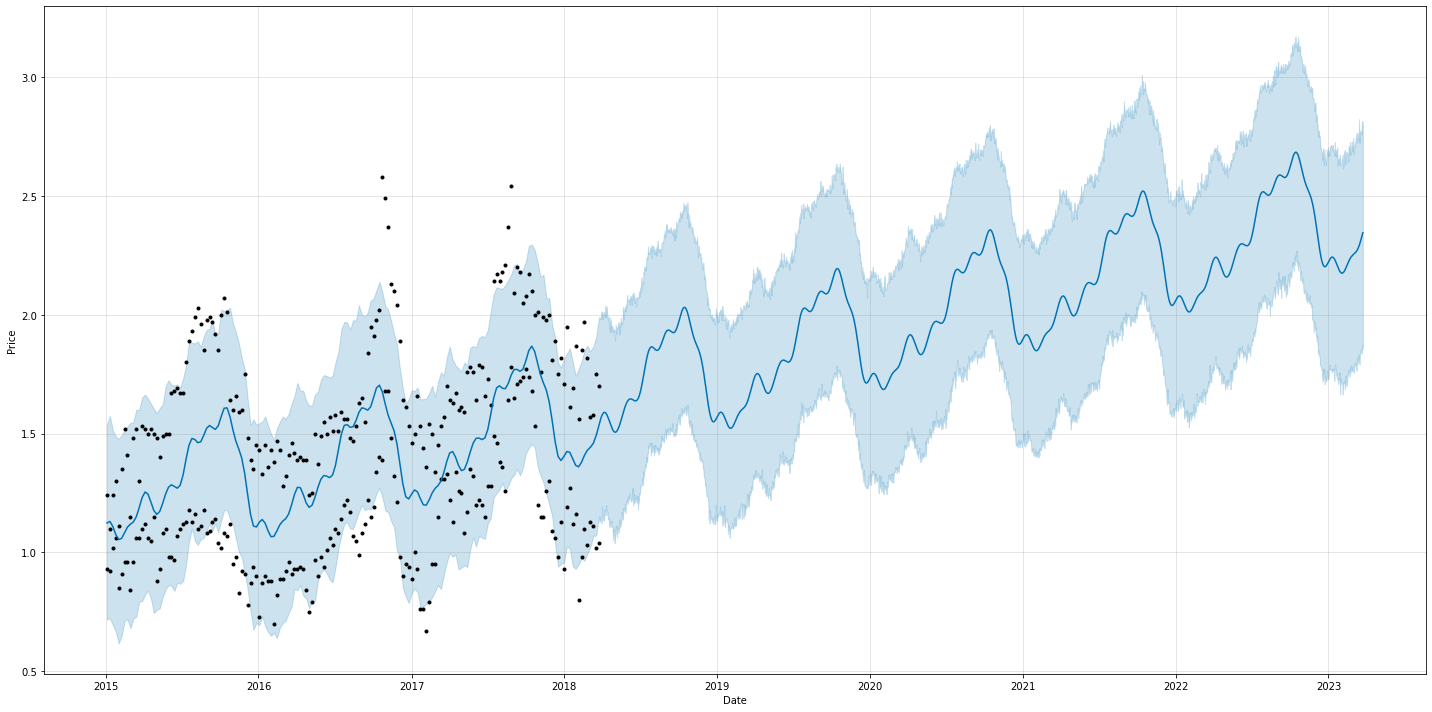

In [32]:
figure = p2.plot(forecast, xlabel='Date', ylabel='Price', figsize=(20,10))

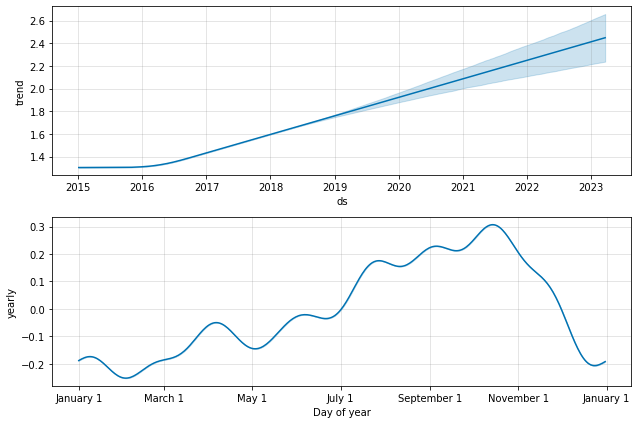

In [30]:
figure = p2.plot_components(forecast)